In [2]:
import pandas as pd

In [3]:
df_rating = pd.read_csv('../data/rating.csv')

In [4]:
df_rating.head(5)

,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,article,title_sentiment
0,81664,NaN,Forbes,"Elizabeth Brownfield, Contributor, \n Elizabet...",superstar chef yannick alléno brings refined f...,Now open in Mayfair at Four Seasons Hotel Lond...,https://www.forbes.com/sites/elizabethbrownfie...,https://imageio.forbes.com/specials-images/ima...,2023-11-01 03:27:21.000000,"Pavyllon London, at Four Seasons Hotel London ...",Monaco,"pavyllon london, at four seasons hotel london ...",Neutral
1,81667,NaN,CNA,NaN,nice claim top spot in ligue 1 with late win a...,Nice moved into provisional first place in the...,https://www.channelnewsasia.com/sport/nice-cla...,https://onecms-res.cloudinary.com/image/upload...,2023-10-27 21:28:48.000000,Nice moved into provisional first place in the...,Monaco,nice moved into provisional first place in the...,Positive
2,81694,time,Time,Christina Larson / AP,amphibians are the world’s most vulnerable spe...,"The world’s frogs, salamanders, newts, and oth...",https://time.com/6320467/amphibians-most-vulne...,https://api.time.com/wp-content/uploads/2023/1...,2023-10-04 17:36:18.000000,"The worlds frogs, salamanders, newts and other...",Madagascar,"the world’s frogs, salamanders, newts and othe...",Negative
3,81695,NaN,Phys.Org,Sara Schmidt,image: rusty red waters in madagascar,Iron-rich sediment colors the red-orange water...,https://phys.org/news/2023-10-image-rusty-red-...,https://scx2.b-cdn.net/gfx/news/2023/image-rus...,2023-10-31 18:04:02.000000,Iron-rich sediment colors the red-orange water...,Madagascar,iron-rich sediment colors the red-orange water...,Neutral
4,81703,NaN,Digital Trends,Jason Struss,everything leaving max (formerly hbo max) in n...,From Gangs of London to Fear the Walking Dead ...,https://www.digitaltrends.com/movies/everythin...,https://www.digitaltrends.com/wp-content/uploa...,2023-10-23 23:09:18.000000,"Everything ends. No, I’m not having an existen...",Madagascar,"everything ends. no, i’m not having an existen...",Neutral


In [5]:
df_domains_location = pd.read_csv('../data/domains_location.csv')

In [6]:
df_domains_location.head(5)

,SourceCommonName,location,Country
0,00221.info,SG,Senegal
1,01net.com,FR,France
2,01net.it,IT,Italy
3,0223.com.ar,AR,Argentina
4,022china.com,CH,China


In [7]:
df_traffic = pd.read_csv('../data/traffic.csv')

In [8]:
df_traffic.head(5)

,GlobalRank,TldRank,Domain,TLD,RefSubNets,RefIPs,IDN_Domain,IDN_TLD,PrevGlobalRank,PrevTldRank,PrevRefSubNets,PrevRefIPs
0,1,1,google.com,com,471274,2151358,google.com,com,1,1,471248,2147402
1,2,2,facebook.com,com,465424,2250631,facebook.com,com,2,2,465297,2247135
2,3,3,youtube.com,com,420579,1852995,youtube.com,com,3,3,420483,1848940
3,4,4,twitter.com,com,404985,1757127,twitter.com,com,4,4,404998,1753939
4,5,5,instagram.com,com,364746,1598085,instagram.com,com,5,5,364618,1594892


Merging DataFrames

In [10]:
# Merge data_df with domains_location_df on the source name or common domain name
df_merged = pd.merge(df_rating, df_domains_location, left_on='source_name', right_on='SourceCommonName', how='left')

# Merge the result with traffic_data_df on domain
df_merged = pd.merge(df_merged, df_traffic, left_on='source_name', right_on='Domain', how='left')

# Check the merged dataframe
# print("Merged DataFrame Info:")
# print(df_merged.info())
print(df_merged.head())


   article_id source_id     source_name  \
0       81664       NaN          Forbes   
1       81667       NaN             CNA   
2       81694      time            Time   
3       81695       NaN        Phys.Org   
4       81703       NaN  Digital Trends   

                                              author  \
0  Elizabeth Brownfield, Contributor, \n Elizabet...   
1                                                NaN   
2                              Christina Larson / AP   
3                                       Sara Schmidt   
4                                       Jason Struss   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                         description  \
0  Now open

Keyword Extraction and Analysis

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer as tfid

# Extract keywords from the title and content
def extract_keywords(corpus, top_n=10):
    vectorizer = tfid(max_df=0.85, stop_words='english', max_features=10000)
    tfidf_matrix = vectorizer.fit_transform(corpus)
    feature_names = vectorizer.get_feature_names_out()

    keywords = []
    for doc in range(tfidf_matrix.shape[0]):
        sorted_items = tfidf_matrix[doc].toarray().flatten().argsort()[::-1]
        top_keywords = [feature_names[i] for i in sorted_items[:top_n]]
        keywords.append(top_keywords)

    return keywords

# Example usage
df_merged['title_keywords'] = extract_keywords(df_merged['title'])
df_merged['content_keywords'] = extract_keywords(df_merged['content'])
print(df_merged[['title', 'title_keywords', 'content_keywords']].head())


                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                      title_keywords  \
0  [superstar, chef, brings, french, london, zuri...   
1  [nice, late, claim, spot, win, emails, embrace...   
2  [vulnerable, species, threats, increasing, wor...   
3  [madagascar, waters, image, red, em, embrace, ...   
4  [max, hbo, leaving, november, 2023, email, emb...   

                                    content_keywords  
0  [london, lane, seasons, hotel, park, prolific,...  
1  [nice, 588, provisional, goal, foot, secured, ...  
2  [studied, trouble, threatened, assessment, spe...  
3  [colors, astronaut, orange, iron, waters, sept...  
4  [lots, streamer, ends, lineup, max, true, addi..

Topic Modeling

In [19]:
import gensim
from gensim import corpora
from gensim.models import LdaModel

# Prepare the data for topic modeling
documents = df_merged['content'].dropna().tolist()
tokenized_docs = [gensim.utils.simple_preprocess(doc) for doc in documents]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tokenized_docs)
corpus = [dictionary.doc2bow(doc) for doc in tokenized_docs]

# Apply LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

# Assign topics to each document
def get_document_topics(lda_model, corpus):
    topics = []
    for doc_bow in corpus:
        topic_probs = lda_model.get_document_topics(doc_bow)
        # Get the topic with the highest probability
        dominant_topic = max(topic_probs, key=lambda x: x[1])[0]
        topics.append(dominant_topic)
    return topics

df_merged['topics'] = get_document_topics(lda_model, corpus)


In [20]:
print(df_merged.head())
print(df_merged.columns)

   article_id source_id     source_name  \
0       81664       NaN          Forbes   
1       81667       NaN             CNA   
2       81694      time            Time   
3       81695       NaN        Phys.Org   
4       81703       NaN  Digital Trends   

                                              author  \
0  Elizabeth Brownfield, Contributor, \n Elizabet...   
1                                                NaN   
2                              Christina Larson / AP   
3                                       Sara Schmidt   
4                                       Jason Struss   

                                               title  \
0  superstar chef yannick alléno brings refined f...   
1  nice claim top spot in ligue 1 with late win a...   
2  amphibians are the world’s most vulnerable spe...   
3              image: rusty red waters in madagascar   
4  everything leaving max (formerly hbo max) in n...   

                                         description  \
0  Now open

Sentiment Analysis

In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# Analyze sentiment in titles
df_merged['title_sentiment_score'] = df_merged['title'].apply(lambda x: analyzer.polarity_scores(x)['compound'])

# Example: Show sentiment scores
print(df_merged[['title', 'title_sentiment_score']].head())


                                               title  title_sentiment_score
0  superstar chef yannick alléno brings refined f...                 0.0000
1  nice claim top spot in ligue 1 with late win a...                 0.8126
2  amphibians are the world’s most vulnerable spe...                -0.6115
3              image: rusty red waters in madagascar                 0.0000
4  everything leaving max (formerly hbo max) in n...                 0.0000


Exploring the Data

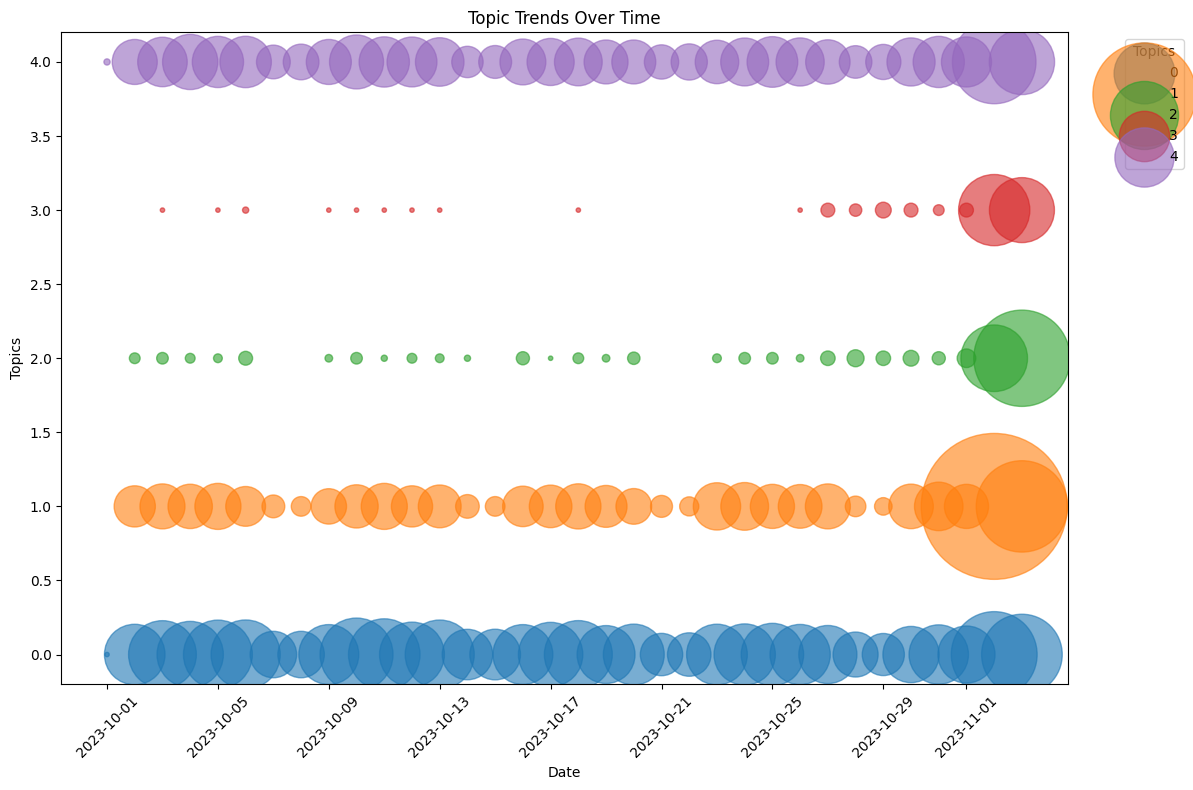

In [22]:
import matplotlib.pyplot as plt

# Convert the 'published_at' column to datetime
df_merged['published_at'] = pd.to_datetime(df_merged['published_at'], errors='coerce')

# Extract the date part from the 'published_at' column
df_merged['published_date'] = df_merged['published_at'].dt.date

# Check if 'topics' column exists
if 'topics' in df_merged.columns:
    # Group by the 'published_date' and 'topics' to get the count of topics per day
    topic_counts = df_merged.groupby(['published_date', 'topics']).size().unstack(fill_value=0)

    # Plotting the topic trends over time
    plt.figure(figsize=(12, 8))
    for topic in topic_counts.columns:
        plt.scatter(topic_counts.index, [topic]*len(topic_counts), 
                    s=topic_counts[topic]*10, label=topic, alpha=0.6)

    plt.title('Topic Trends Over Time')
    plt.xlabel('Date')
    plt.ylabel('Topics')
    plt.xticks(rotation=45)
    plt.legend(title='Topics', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()
else:
    print("Column 'topics' not found in DataFrame. Please ensure that topic modeling has been performed.")

